In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def simulate_GBM(timerange, steps, paths, mu, sigma, cur_price, VarPerc, show_plot=False):
    patharray = np.array([[]])
    closeprices = np.array([])
    del_t = timerange/steps
    for path in range(paths):
        progresslist = np.array([np.float(cur_price)])
        for i in range(steps):
            epsilon = np.random.normal(0, 1)
            S = progresslist[-1]
            del_S = mu*S*del_t + sigma*epsilon*S*(np.sqrt(del_t))
            new_S = S + del_S
            progresslist = np.append(progresslist, new_S)

        if patharray.shape[1] == 0:
            patharray = np.array([progresslist])
        else:
            patharray = np.concatenate((patharray, np.array([progresslist])), axis=0)

        closeprices = np.append(closeprices, progresslist[-1])

    if show_plot:
        for i in range(patharray.shape[0]):
            plt.plot(patharray[i])
        plt.show()

    VaR = cur_price - np.percentile(closeprices, 100 - VarPerc)
    return VaR

In [4]:
df = pd.read_csv('GE.csv')[14099:14350].reset_index().drop('index', axis = 1)
df2 = pd.read_csv('GE.csv')[14350:14602].reset_index().drop('index', axis = 1)
df['returns'] = np.float(0)

for i in range(1, len(df)):
    df['returns'][i] = float((df['Adj Close'][i] - df['Adj Close'][i-1])/df['Adj Close'][i-1])

df2['returns'] = np.float(0)
for i in range(1, len(df2)):
    df2['returns'][i] = float((df2['Adj Close'][i] - df2['Adj Close'][i-1])/df2['Adj Close'][i-1])

Actual VaR: -0.26432985004446125


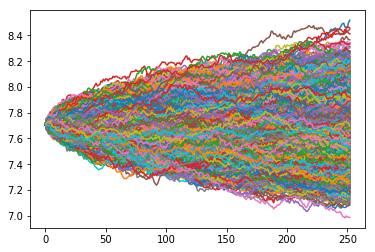

Estimated VaR: -0.30554690049691935


In [5]:
print("Actual VaR:", df['Adj Close'][len(df)-1]*np.percentile(df2['returns'], 5))

print('Estimated VaR:', simulate_GBM(1, len(df2), 10000, np.mean(df['returns']), np.std(df['returns']), df['Adj Close'][len(df)-1], 5, True))